#Problem Statement:

We are tasked with predicting the popularity of tracks (binary classification) based on various audio features from a Spotify dataset. The dependent feature (DF) is track_popularity, which has been binarized (0 or 1) to represent whether a track is popular or not based on the average popularity score. The independent features (IFs) include several numeric attributes, such as tempo, danceability, energy, loudness, and others, which describe the audio characteristics of each track.

The goal is to build and evaluate six machine learning classifiers to accurately predict whether a track will be popular (DF) based on these audio features (IFs). Cross-validation will be used to systematically tune and compare the performance of these models on the training and validation sets, and final results will be reported on the test set.

##DATA UNDERSTANDING

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
spotify_data = pd.read_csv('spotify_songs.csv')


In [3]:
spotify_data.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
print("\nDataset information:")
print(spotify_data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-nul

In [5]:
print(spotify_data.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [6]:

print("\nShape of the dataset:")
print(spotify_data.shape)

print("\nDistribution of the target variable 'track_popularity':")
print(spotify_data['track_popularity'].value_counts(normalize=True))



Shape of the dataset:
(32833, 23)

Distribution of the target variable 'track_popularity':
track_popularity
0      0.082326
1      0.017513
57     0.016477
60     0.015655
51     0.015655
         ...   
97     0.000670
95     0.000457
96     0.000213
99     0.000122
100    0.000061
Name: proportion, Length: 101, dtype: float64


In [7]:

print("\nSummary statistics for numerical features:")
print(spotify_data.describe())



Summary statistics for numerical features:
       track_popularity  danceability        energy  ...       valence         tempo    duration_ms
count      32833.000000  32833.000000  32833.000000  ...  32833.000000  32833.000000   32833.000000
mean          42.477081      0.654850      0.698619  ...      0.510561    120.881132  225799.811622
std           24.984074      0.145085      0.180910  ...      0.233146     26.903624   59834.006182
min            0.000000      0.000000      0.000175  ...      0.000000      0.000000    4000.000000
25%           24.000000      0.563000      0.581000  ...      0.331000     99.960000  187819.000000
50%           45.000000      0.672000      0.721000  ...      0.512000    121.984000  216000.000000
75%           62.000000      0.761000      0.840000  ...      0.693000    133.918000  253585.000000
max          100.000000      0.983000      1.000000  ...      0.991000    239.440000  517810.000000

[8 rows x 13 columns]


##DATA PREPROCESSING

In [8]:
# Drop all non-numeric columns
spotify_data_numeric = spotify_data.select_dtypes(include=['float64', 'int64'])

# Binarize the 'track_popularity' column
mean_value = spotify_data_numeric['track_popularity'].mean()

# Binarize the track_popularity based on its mean
binarizer = Binarizer(threshold=mean_value)
spotify_data_numeric['track_popularity'] = binarizer.fit_transform(spotify_data_numeric[['track_popularity']])
print(np.unique(spotify_data_numeric['track_popularity']))  # This should print [0 1]


# Split the data into features (X) and target (y)
X = spotify_data_numeric.drop(columns=['track_popularity'])
y = spotify_data_numeric['track_popularity']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into 80% for training and CV, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


[0 1]


##DATA VISUALIZATION

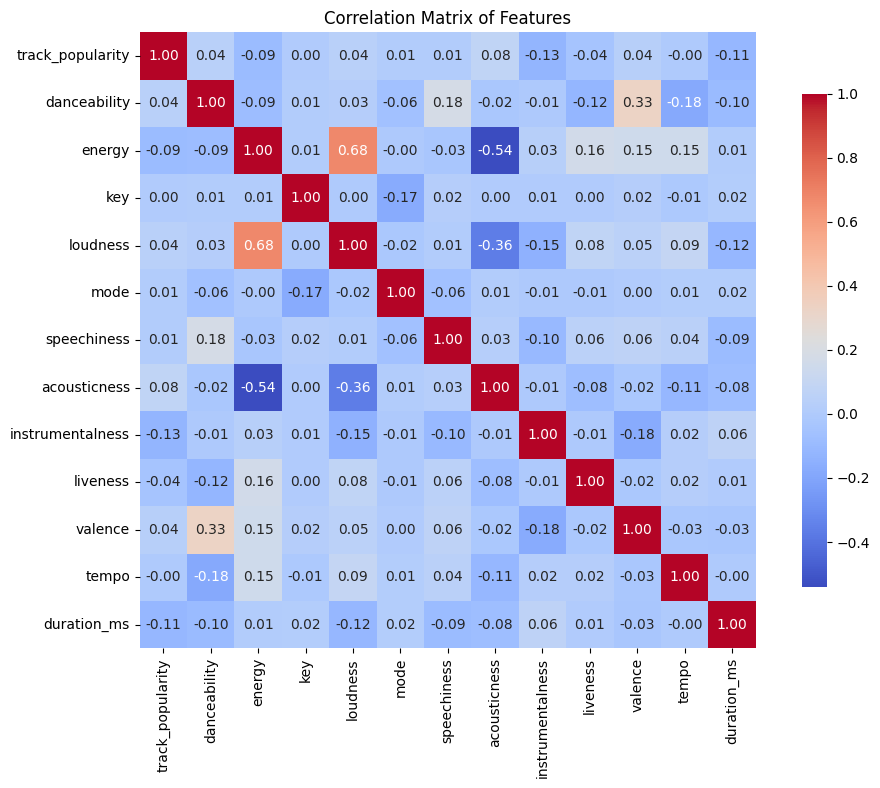

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = spotify_data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')
plt.show()


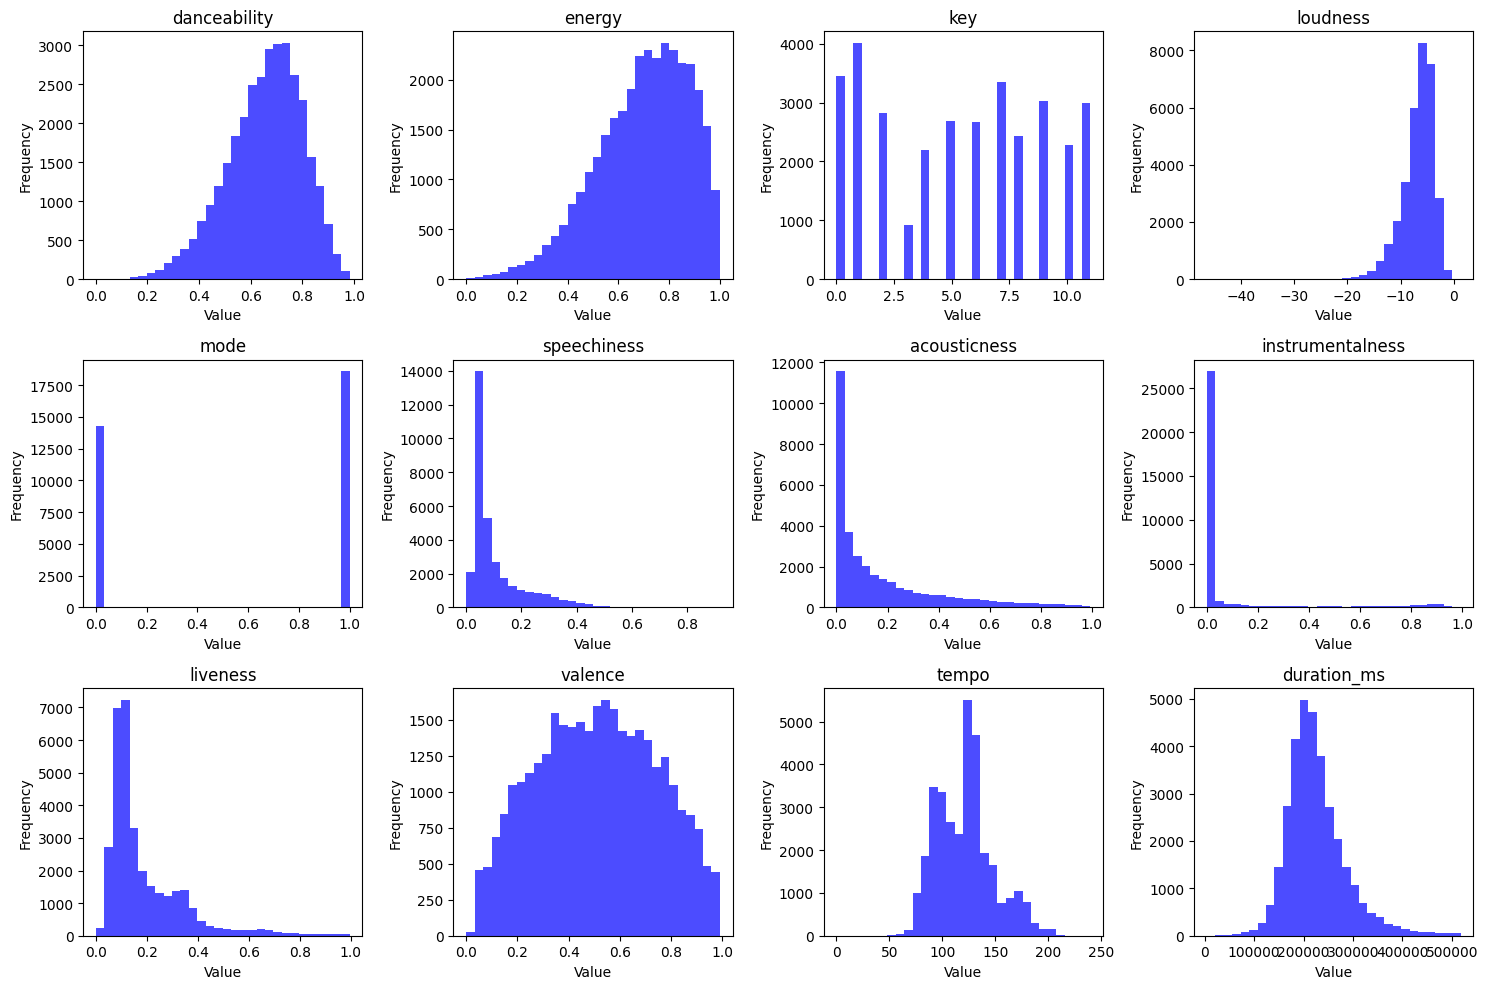

In [10]:
import math


target_column = 'track_popularity'
num_features = len(spotify_data_numeric.columns.drop(target_column))

# Calculate the number of rows and columns needed for the subplots
cols = 4  # Number of columns you want
rows = math.ceil(num_features / cols)  # Dynamically calculate rows based on the number of features

plt.figure(figsize=(15, 10))

# Plot histograms for each feature, excluding the target variable
for i, column in enumerate(spotify_data_numeric.drop(columns=[target_column]).columns):
    plt.subplot(rows, cols, i + 1)
    plt.hist(spotify_data_numeric[column], bins=30, alpha=0.7, color='blue')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##FEATURE SELECTION (univariate)

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top k features based on univariate statistical tests
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_features_indices = selector.get_support(indices=True)

# Display the selected feature names
selected_feature_names = X.columns[selected_features_indices]
print("Selected features based on univariate feature selection:")
print(selected_feature_names)


Selected features based on univariate feature selection:
Index(['danceability', 'energy', 'acousticness', 'instrumentalness',
       'duration_ms'],
      dtype='object')


##BASELINE ESTIMATORS
 we'll start by building six baseline estimators using their default parameters, perform systematic cross-validation (CV) for hyperparameter tuning, and then compare the models.

In [12]:
from sklearn.model_selection import cross_val_score
estimators = {
    'Logistic Regression': LogisticRegression(max_iter=100000),  # Increased max_iter
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(max_iter=100000),  # Increased max_iter
    'Decision Tree': DecisionTreeClassifier()
}

# Perform cross-validation and store the scores
cv_results = {}
for name, estimator in estimators.items():
    scores = cross_val_score(estimator, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_results[name] = scores
    print(f"{name}: Mean accuracy = {scores.mean():.3f}, Std deviation = {scores.std():.3f}")

Logistic Regression: Mean accuracy = 0.600, Std deviation = 0.006
Random Forest: Mean accuracy = 0.652, Std deviation = 0.003
Gradient Boosting: Mean accuracy = 0.613, Std deviation = 0.006
KNN: Mean accuracy = 0.589, Std deviation = 0.005
SVM: Mean accuracy = 0.610, Std deviation = 0.004
Decision Tree: Mean accuracy = 0.611, Std deviation = 0.004


##HYPERPARAMETER TUNING
perform a grid search or random search for each model

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).

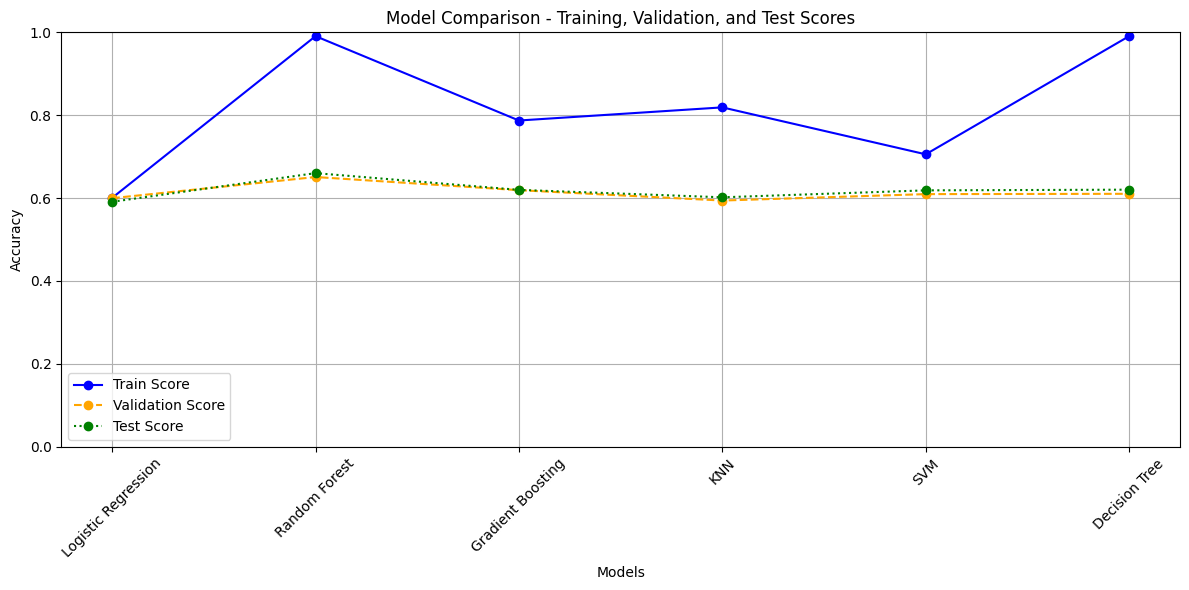

In [13]:
from sklearn.model_selection import GridSearchCV, cross_validate
import matplotlib.pyplot as plt

# Define the classifiers and their hyperparameters
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=100000),  # Increased max_iter
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(max_iter=100000),  # Increased max_iter
    'Decision Tree': DecisionTreeClassifier()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 5, 10, 15, 20]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]
    },
    'KNN': {
        'n_neighbors': [2, 3, 5, 7, 9]
    },
    'SVM': {
        'C': [0.001, 0.01, 0.1, 1, 5, 10],
        'kernel': ['linear', 'rbf']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 15, 20, 25]
    }
}
results = {}

# Perform Grid Search and Cross-Validation
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)

    # Save the best results
    results[name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'cv_results': grid_search.cv_results_,
        'test_score': grid_search.score(X_test, y_test)  # Evaluate on the test set
    }

# Collecting scores for plotting
train_scores = []
val_scores = []
test_scores = []

for name, result in results.items():
    train_scores.append(result['cv_results']['mean_train_score'].max())  # Maximum train score
    val_scores.append(result['best_score'])  # Best validation score
    test_scores.append(result['test_score'])  # Test score

# Plotting the results
plt.figure(figsize=(12, 6))
x = range(len(classifiers))

plt.plot(x, train_scores, marker='o', label='Train Score', linestyle='-', color='blue')
plt.plot(x, val_scores, marker='o', label='Validation Score', linestyle='--', color='orange')
plt.plot(x, test_scores, marker='o', label='Test Score', linestyle=':', color='green')

# Add labels and title
plt.xticks(x, results.keys(), rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Training, Validation, and Test Scores')
plt.ylim(0, 1)  # Set the y-axis limits
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [14]:
# Output the best parameters for each model
for name, result in results.items():
    print(f"Best parameters for {name}: {result['best_params']}")


Best parameters for Logistic Regression: {'C': 1}
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 300}
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'n_estimators': 300}
Best parameters for KNN: {'n_neighbors': 3}
Best parameters for SVM: {'C': 5, 'kernel': 'rbf'}
Best parameters for Decision Tree: {'max_depth': None}


In [15]:
# Assuming cv_results contains the base model scores
base_results = {
    'Logistic Regression': cv_results['Logistic Regression'].mean(),
    'Random Forest': cv_results['Random Forest'].mean(),
    'Gradient Boosting': cv_results['Gradient Boosting'].mean(),
    'KNN': cv_results['KNN'].mean(),
    'SVM': cv_results['SVM'].mean(),
    'Decision Tree': cv_results['Decision Tree'].mean(),
}

# Prepare results for comparison
comparison_results = {}
for name in base_results.keys():
    improvement = (results[name]['test_score'] - base_results[name]) / base_results[name] * 100
    comparison_results[name] = {
        'Base Score': base_results[name],
        'Tuned Score': results[name]['test_score'],
        'Improvement (%)': improvement
    }

# Display comparison results
for model, scores in comparison_results.items():
    print(f"{model}: Base Score = {scores['Base Score']:.3f}, Tuned Score = {scores['Tuned Score']:.3f}, Improvement = {scores['Improvement (%)']:.2f}%")


Logistic Regression: Base Score = 0.600, Tuned Score = 0.591, Improvement = -1.45%
Random Forest: Base Score = 0.652, Tuned Score = 0.660, Improvement = 1.33%
Gradient Boosting: Base Score = 0.613, Tuned Score = 0.620, Improvement = 1.15%
KNN: Base Score = 0.589, Tuned Score = 0.602, Improvement = 2.26%
SVM: Base Score = 0.610, Tuned Score = 0.619, Improvement = 1.50%
Decision Tree: Base Score = 0.611, Tuned Score = 0.620, Improvement = 1.49%


In [16]:
from tabulate import tabulate


param_df = pd.DataFrame.from_dict(param_grids, orient='index')
print(tabulate(param_df, headers='keys', tablefmt='simple'))


                     C                             n_estimators         max_depth                  learning_rate                 n_neighbors      kernel
-------------------  ----------------------------  -------------------  -------------------------  ----------------------------  ---------------  -----------------
Logistic Regression  [0.001, 0.01, 0.1, 1, 5, 10]  nan                  nan                        nan                           nan              nan
SVM                  [0.001, 0.01, 0.1, 1, 5, 10]  nan                  nan                        nan                           nan              ['linear', 'rbf']
Random Forest        nan                           [50, 100, 200, 300]  [None, 5, 10, 15, 20]      nan                           nan              nan
Gradient Boosting    nan                           [50, 100, 200, 300]  nan                        [0.001, 0.01, 0.1, 0.2, 0.5]  nan              nan
Decision Tree        nan                           nan               

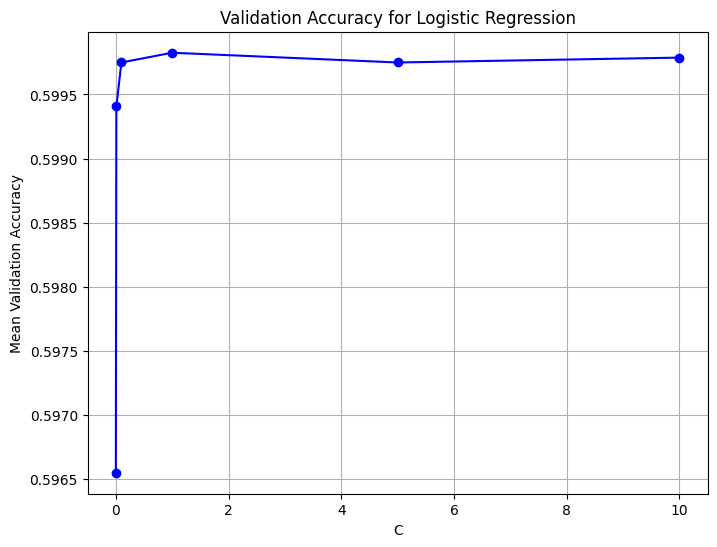

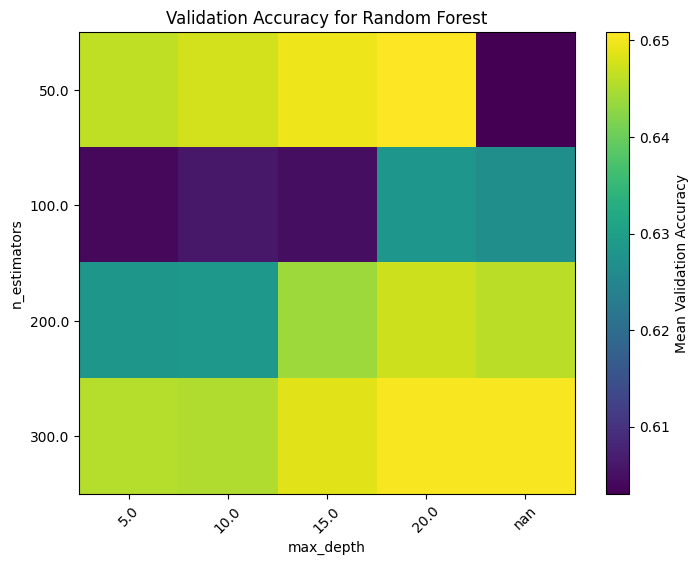

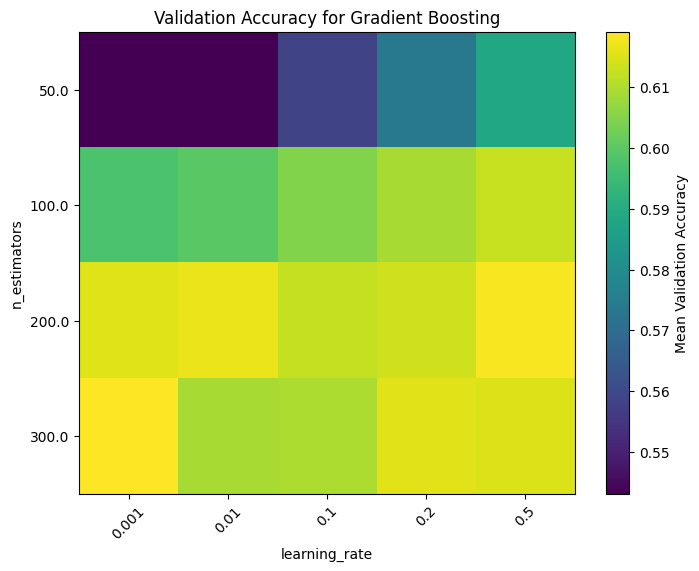

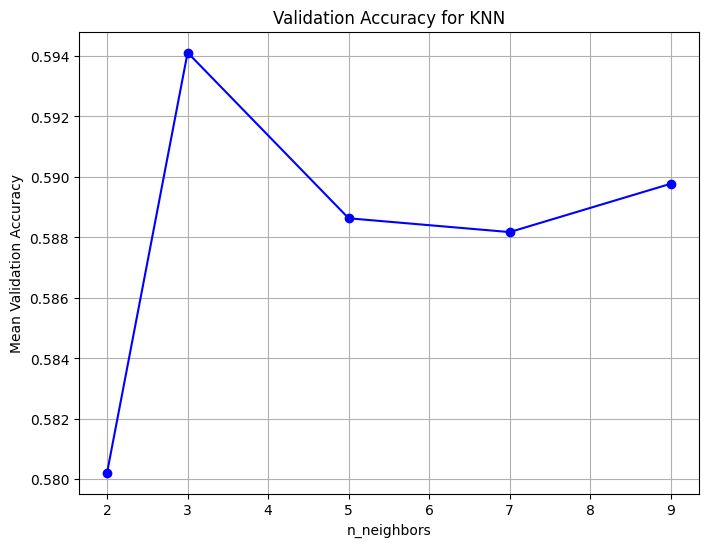

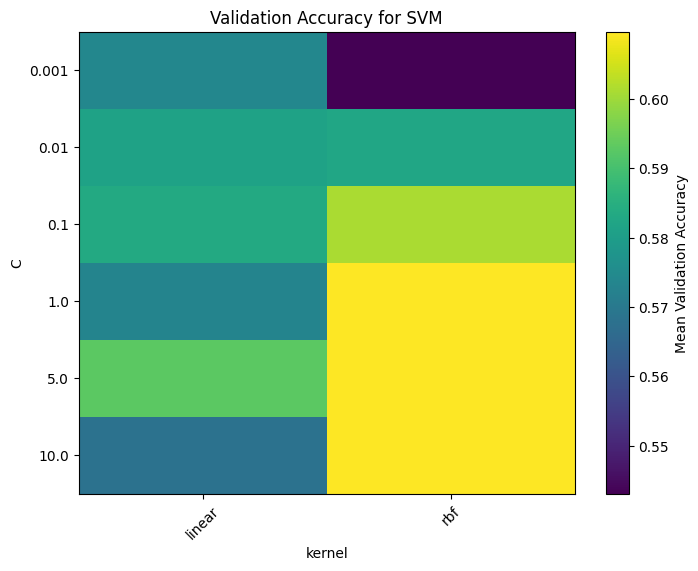

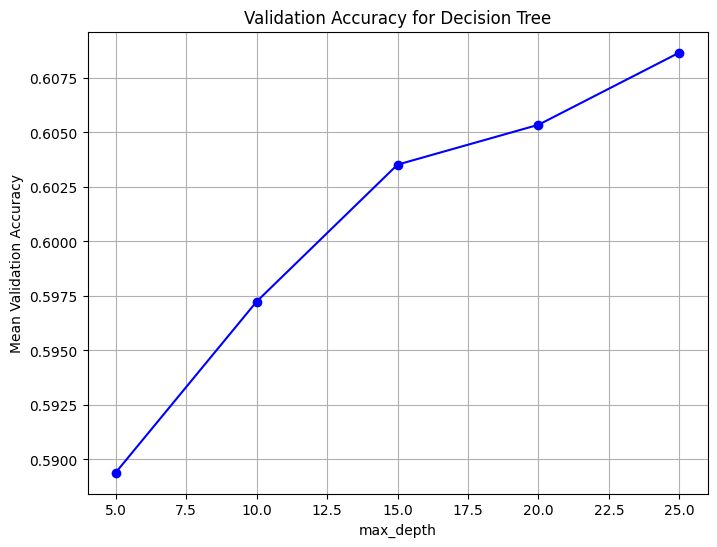

In [20]:
def plot_grid_search(cv_results, param_grid, model_name):
    # Extract mean test scores and parameters
    mean_test_scores = cv_results['mean_test_score']
    mean_test_scores = np.nan_to_num(mean_test_scores, nan=0.0)  # Replace NaN with 0

    # Get the parameter names
    param_names = list(param_grid.keys())

    # Check if there are two hyperparameters to plot a 2D grid
    if len(param_names) == 2:
        param1 = cv_results['param_' + param_names[0]]
        param2 = cv_results['param_' + param_names[1]]

        # Check if the parameters are categorical
        if isinstance(param1[0], str) or isinstance(param2[0], str):
            param1_values = np.unique(param1)
            param2_values = np.unique(param2)
        else:
            param1_values = np.unique(np.array(param1, dtype=float))
            param2_values = np.unique(np.array(param2, dtype=float))

        # Reshape the mean_test_scores to match grid shape for plotting
        scores_matrix = mean_test_scores.reshape(len(param1_values), len(param2_values))

        # Plot the grid of validation accuracy
        plt.figure(figsize=(8, 6))
        plt.imshow(scores_matrix, interpolation='nearest', cmap='viridis', aspect='auto')
        plt.title(f'Validation Accuracy for {model_name}')
        plt.xlabel(param_names[1])
        plt.ylabel(param_names[0])
        plt.colorbar(label='Mean Validation Accuracy')
        plt.xticks(np.arange(len(param2_values)), param2_values, rotation=45)
        plt.yticks(np.arange(len(param1_values)), param1_values)
        plt.grid(False)
        plt.show()

    # If there's only one hyperparameter, just plot 1D
    elif len(param_names) == 1:
        param1 = cv_results['param_' + param_names[0]]
        plt.figure(figsize=(8, 6))
        plt.plot(param1, mean_test_scores, marker='o', linestyle='-', color='b')
        plt.title(f'Validation Accuracy for {model_name}')
        plt.xlabel(param_names[0])
        plt.ylabel('Mean Validation Accuracy')
        plt.grid(True)
        plt.show()

# Loop through the results and plot the grid search results
for model_name, result in results.items():
    plot_grid_search(result['cv_results'], param_grids[model_name], model_name)


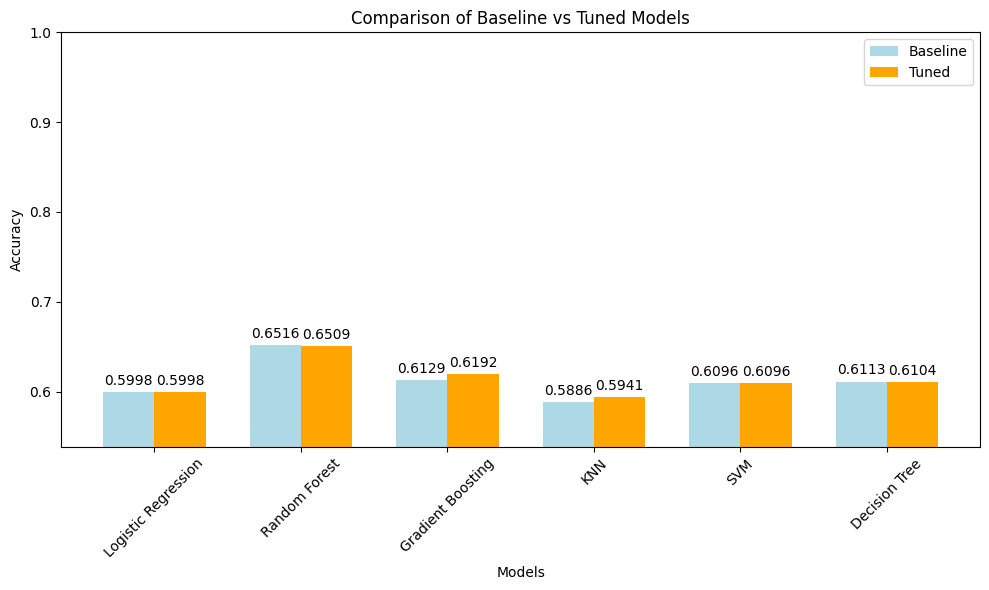

In [22]:
# Prepare the data for plotting
model_names = list(estimators.keys())  # Names of the models
baseline_scores = [cv_results[name].mean() for name in model_names]  # Mean baseline scores from cross-validation
tuned_scores = [results[name]['best_score'] for name in model_names]  # Best validation scores from grid search

# Plotting
x = np.arange(len(model_names))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Baseline bars
rects1 = ax.bar(x - width/2, baseline_scores, width, label='Baseline', color='lightblue')

# Tuned model bars
rects2 = ax.bar(x + width/2, tuned_scores, width, label='Tuned', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Baseline vs Tuned Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.set_ylim(min(min(baseline_scores), min(tuned_scores)) - 0.05, 1)  # Dynamic y-axis limits
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',  # Limit label to 4 decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# Tight layout for better fit
fig.tight_layout()

plt.show()
